[View in Colaboratory](https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/1_2_Hello_Music.ipynb)

# Making Music with Python
So how do we use numbers, variables, maths, and lists to make music? We need some way to convert a list of numbers into musical sounds. That is, we need some way of interpreting a lists of numbers into *musical features* — such as pitch, rhythm, or harmony. Obviously there are about a zillion ways to do this, but, as a starting point, I've included some code in the course code repository to get us started. Any way of interpreting numbers into sound is called a *music represntation* — I'll be using this word over and over again throughout the course, because the decisions  about our music representation have a profound impact on the music that we make.


## Notebook Setup
First we have to install a few things. Don't worry about the specifics of the code below. Just know that we are  installing a few software packages that we need in order to make sound in Python and then importing them into our current  notebok session. 

* Warning: you may see a bunch of text when you execute these cells. Don't worry, it's normal.
* Important: you must run these setup cells everytime you open your notebook or restart the session.

In [0]:
# install software repositories
!pip install -q git+https://github.com/davidkant/mai#egg=mai
!pip install -q pretty_midi
!pip install -q pyfluidsynth
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1

In [2]:
# import packages into our notebook
import mai
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Representing music as lists of numbers
This is definitely the least inventive thing I could do, but let's start by interpretting a list as a sequence of notes on a piano keyboard. We'll be using a convention for mapping integers to piano keys called [General MIDI](https://en.wikipedia.org/wiki/General_MIDI). General MIDI maps the key middle C on a piano keyboad to the value `60`.   


The course code package contains a function `mai.make_music()` which will get us started. Don't worry about the code syntax in the following cells — we'll learn about functions later. However, try to understand the music representation. That is, how numbers and lists are being interpreted into music.

Let's start by interpreting a list of numbers into a sequence of notes played on the piano keyboard.

In [3]:
my_music = [30, 50, 42, 61, 75, 2, 33]
mai.make_music(my_music)

I also find it useful to use look at a visual representation.

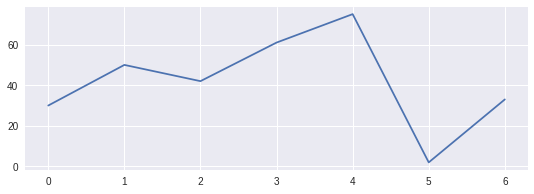

In [4]:
plt.figure(figsize=(9,3))
plt.plot(my_music);

Let's slow that music down by changing the note **duration** to `1` second. Do this by adding the keyword `durs` and giving it the value `1`.

In [5]:
my_music = [30, 50, 42, 61, 75, 2, 33]
mai.make_music(my_music, durs=1)

Now let's give it a **list of durations** called `my_durs`. I think we just figured out to how represent *rhythm*!

In [6]:
my_music = [30, 50, 42, 61, 75, 2, 33]
my_durs = [0.1, 1.0, 0.3, 0.25, 0.5, 2.0, 0.1]
mai.make_music(my_music, durs=my_durs)

We can change the **instrument** using the the keyword `pgm`. Check out General Midi [Program change events](https://en.wikipedia.org/wiki/General_MIDI#Program_change_events) for a list of instruments and their program numbers `pgm`.

In [7]:
my_music = [30, 50, 42, 61, 75, 2, 33]
my_durs = [0.1, 1.0, 0.3, 0.25, 0.5, 2.0, 0.1]
mai.make_music(my_music, durs=my_durs, pgm=39)

We can use **drum sounds** instead by setting keyword `is_drums` to `True`. Check out General Midi [Percussion](https://en.wikipedia.org/wiki/General_MIDI#Percussion) for a list of percussion instruments. Change the note values of `my_music` to hear the different percussion sounds.

In [8]:
my_music = [30, 50, 42, 61, 75, 2, 33]
my_durs = [0.1, 1.0, 0.3, 0.25, 0.5, 2.0, 0.1]
mai.make_music(my_music, durs=my_durs, is_drum=True)

If you want to know more you can check out the help file or consult the [github page](https://github.com/davidkant/mai)

In [9]:
help(mai.make_music)

Help on function make_music in module mai.music_makers:

make_music(pitches=60, durs=0.333, pgm=1, is_drum=False, format='inbrowser', sr=16000)
    Turn lists of numbers into music.
    
    Converts pitch and duration values into MIDI and/or audio playback. Uses
    `pretty_midi` for MIDI representation handling, fluidsynth for resynthesis, 
    and `IPython.display.Audio` for browser playback.
        
    Parameters
    ----------
    pitches : list or scalar
        List of pitches, or scalar if constant pitch. Floating point values are
        interpreted as microtonal pitch deviations.
    durs: list or scalar
        List of durations, or scalar if constant duration. 
    pgm: number
        MIDI program number, in range ``[0, 127]``.
    is_drum : bool
        If True use percussion channel 10.
    format : string
        Which format to render sound to?
        - `'MIDI'` returns MIDI as a `pretty_midi` object
        - `'audio'` returns waveforms as a `numpy` nd.array  
     

## A preview of coming attractions: Generating music

OKTHEN, now the question is: how do we find the right numbers for the music we want to hear? We're going to see many many many different answers to this question throughout the course. Think about it and try to come up with some ideas for next class meeting.

Here's one way to think about it. The power of using a computer is that we don't have to hand-pick all of the notes. Here we use the nifty list comprehension to procedurally generation note pitchs and durations. 

In [10]:
my_music = [x for x in range(48)]
my_durs = [1.0/(x+1) for x in range(48)]
mai.make_music(my_music, durs=my_durs, pgm=1, is_drum=False)

## Floating pitch values are interpretted as microtones...
If you're feeling too confined by the twelve notes of the piano keyboard, floating point values (numbers with a decimal point) are interepreted as microtones, meaning notes between the keys on the piano keyboard. Here are a few fun examples. Don't worry about the code in these cells, just listen.

100 notes between C and C# (two adjacent keys on the piano).

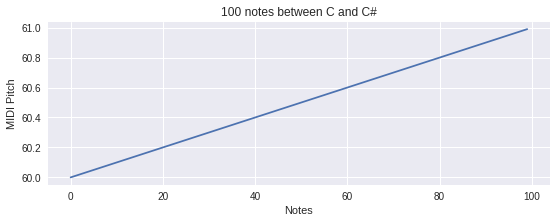

In [11]:
my_music = [60 + x/100.0 for x in range(100)]
my_durs = 3.0/100.0
plt.figure(figsize=(9,3))
plt.plot(my_music)
plt.title('100 notes between C and C#')
plt.ylabel('MIDI Pitch')
plt.xlabel('Notes')
plt.show()
mai.make_music(my_music, durs=my_durs, pgm=1)

Random microtonal pitches.

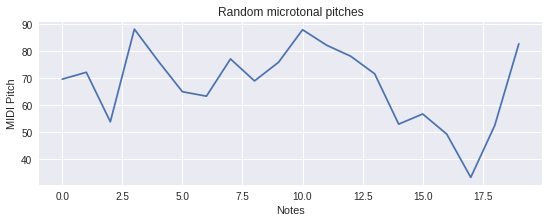

In [12]:
import random
my_music = [random.random() * 60.0 + 30 for x in range(20)]
my_durs = [random.random() for x in range(20)]
plt.figure(figsize=(9,3))
plt.plot(my_music)
plt.title('Random microtonal pitches')
plt.ylabel('MIDI Pitch')
plt.xlabel('Notes')
plt.show()
mai.make_music(my_music, durs=my_durs, pgm=1)

Using a sine function to generate pitches.

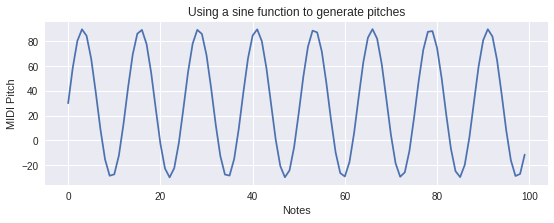

In [13]:
import math
my_music = [math.sin(0.5*x) * 60.0 + 30 for x in range(100)]
my_durs = 0.1
plt.figure(figsize=(9,3))
plt.plot(my_music)
plt.title('Using a sine function to generate pitches')
plt.ylabel('MIDI Pitch')
plt.xlabel('Notes')
plt.show()
mai.make_music(my_music, durs=my_durs, pgm=1)